Universidad del Valle de Guatemala <br>
25/04/2022 <br>
Minería de Datos # 20 

# Hoja de Trabajo 7
## RNA

**Integrantes:**<br>
Walter Saldaña 19897 <br>
José Gutierrez 19111 <br>
Javier Cotto 19324 <br>

### Importar modulos

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import random
import math
import time
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets
from scipy import stats
from sklearn.metrics import confusion_matrix as Confusion_Matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.neural_network import MLPClassifier

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Carga de datos

In [2]:
entrenamiento = pd.read_csv('train.csv', encoding='unicode_escape')
prueba = pd.read_csv('test.csv', encoding='unicode_escape')

### Preprocesamiento

Remover variables cualitativas que no aportan, ya que no son categóricas, y sus frecuencias no pueden ser clasificadas.

In [3]:
entrenamiento = entrenamiento.drop(['Street', 'Id', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                         'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle', 
                         'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                         'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
                         'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 
                         'SaleType', 'SaleCondition'], axis=1)

Eliminar filas que contengan datos nulos (NaN).

In [4]:
entrenamiento.dropna(subset = ["LotFrontage"], inplace = True)
entrenamiento.dropna(subset = ["MasVnrArea"], inplace = True)
entrenamiento.dropna(subset = ["GarageYrBlt"], inplace = True)

Normalizacion

In [6]:
def normalizer(column):
    return (column - column.mean())/(column.std())

for col in entrenamiento.columns:
    entrenamiento[col] = normalizer(entrenamiento[col])

Eliminacion de datos atipicos

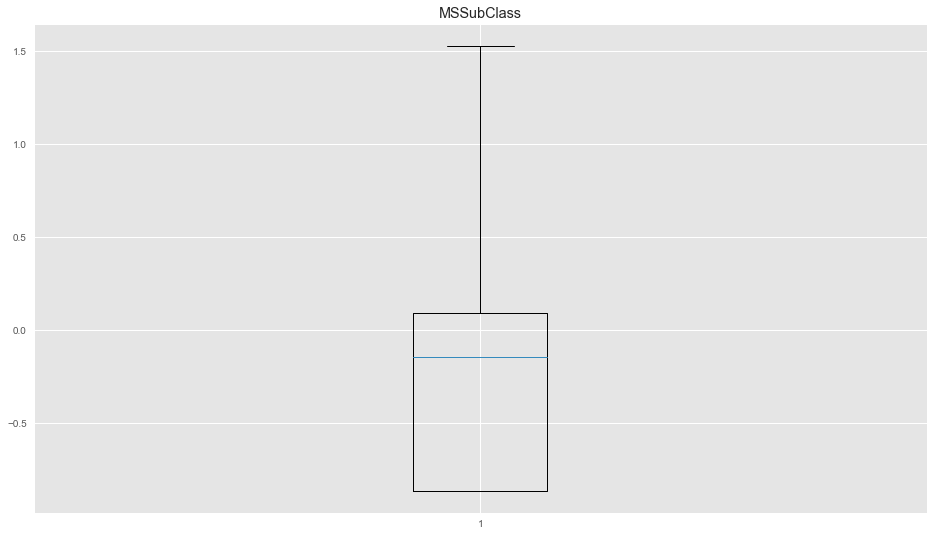

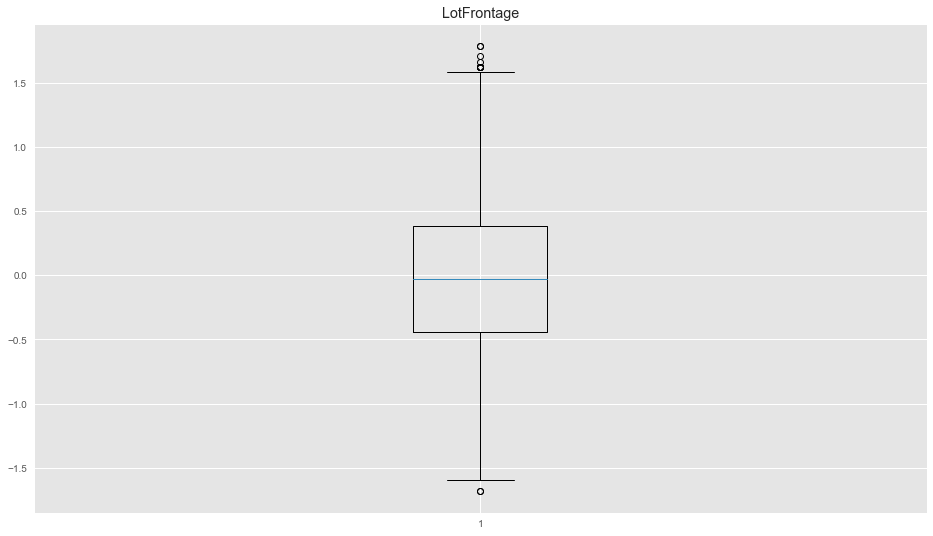

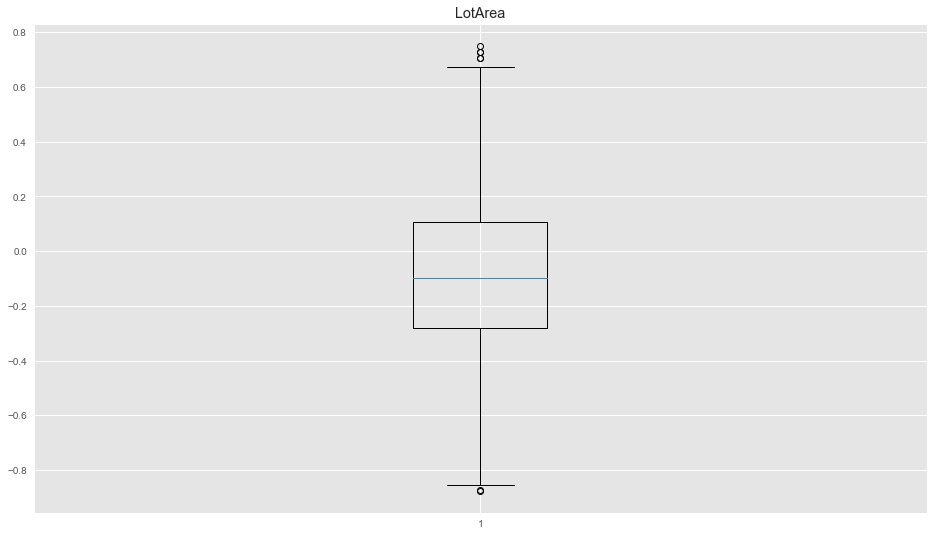

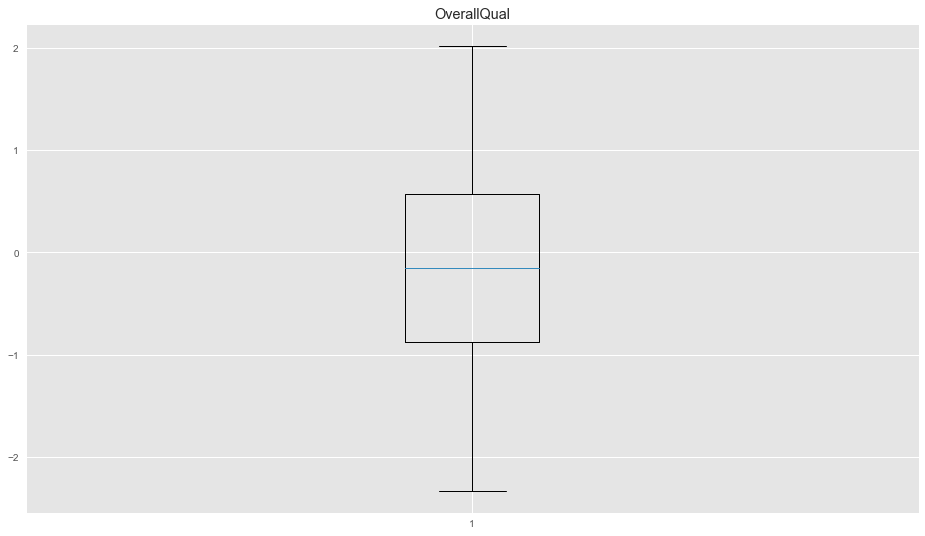

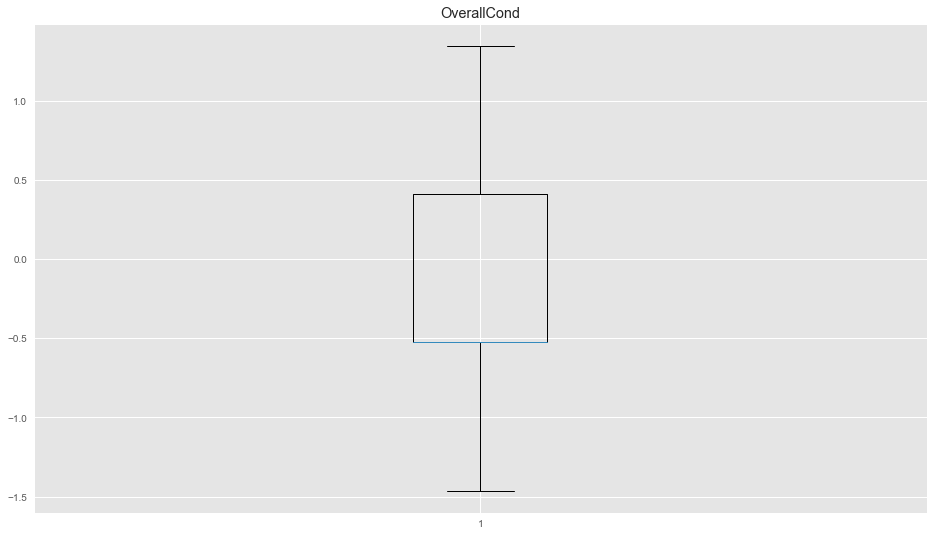

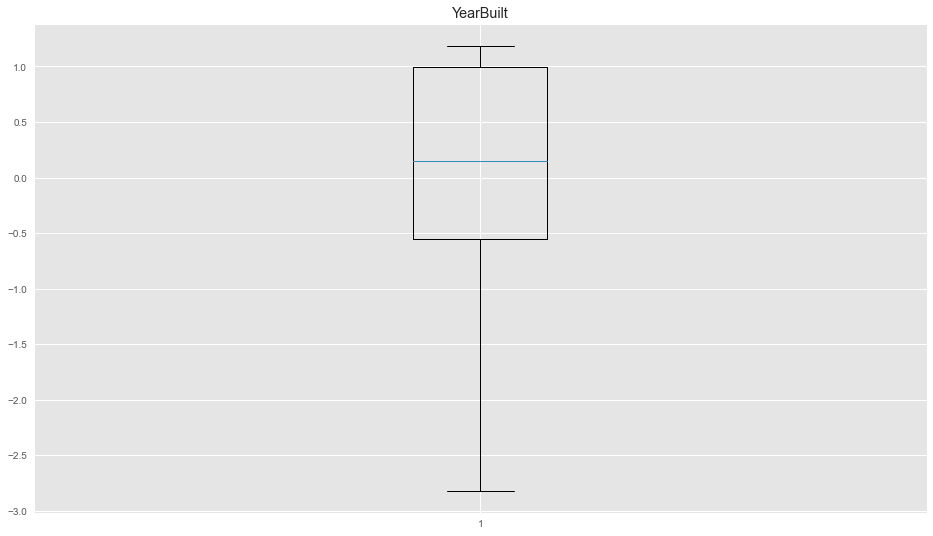

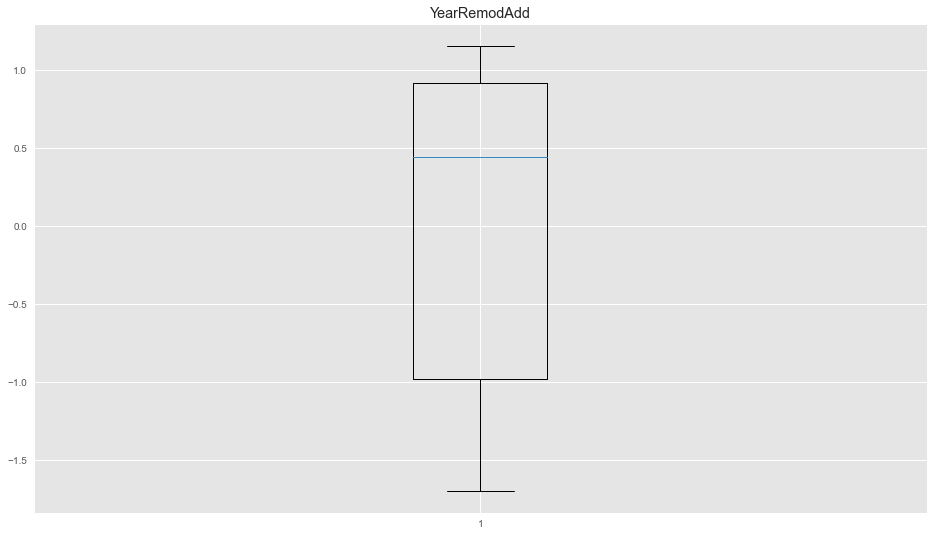

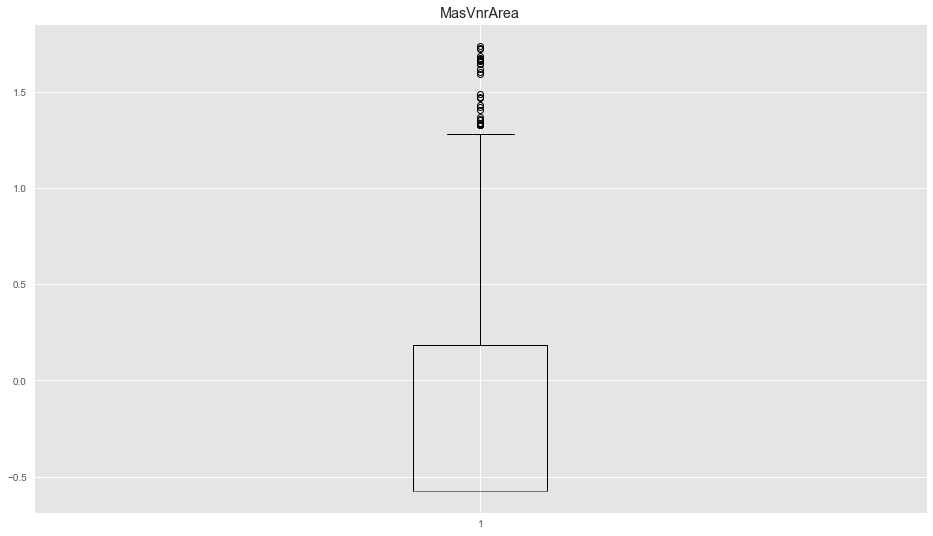

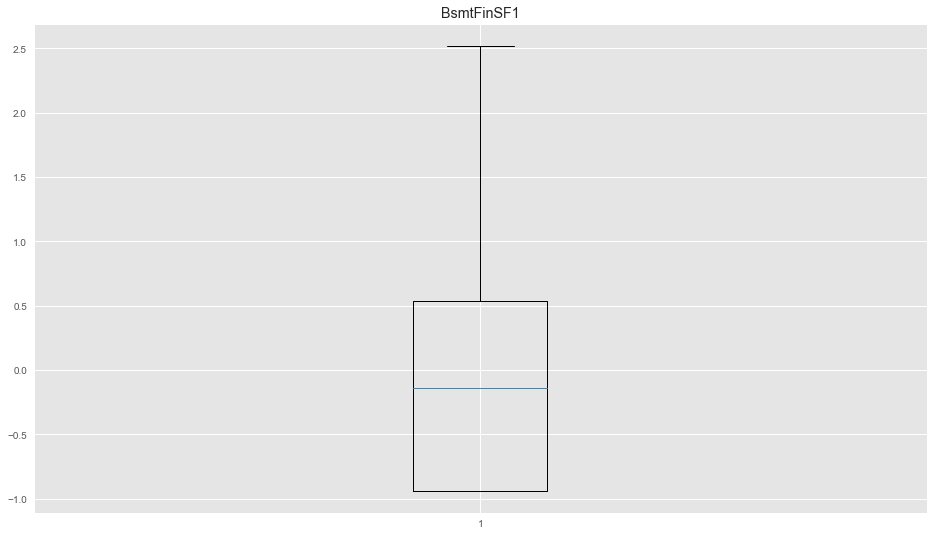

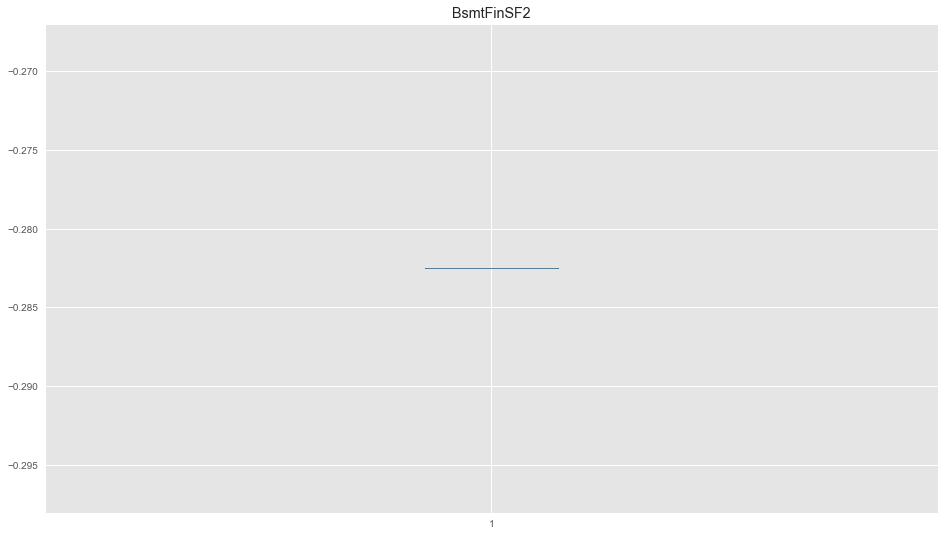

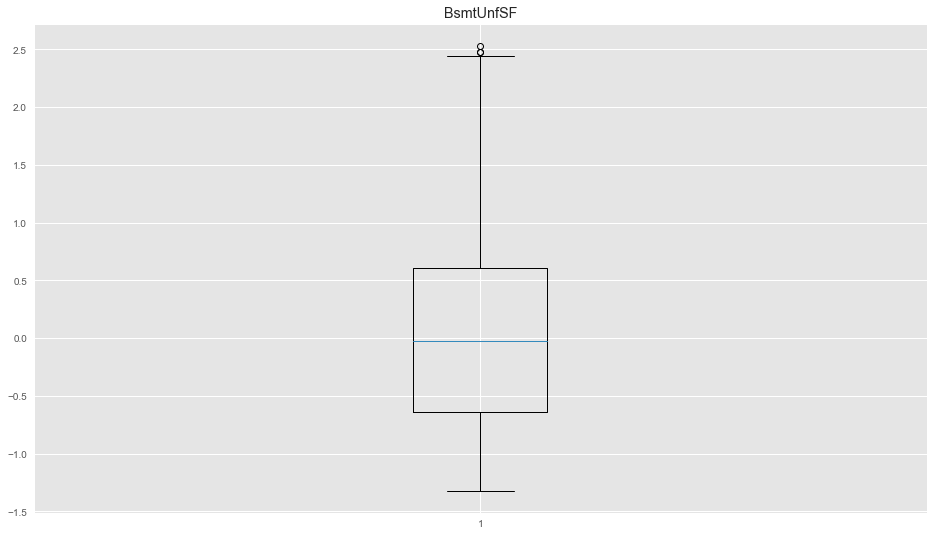

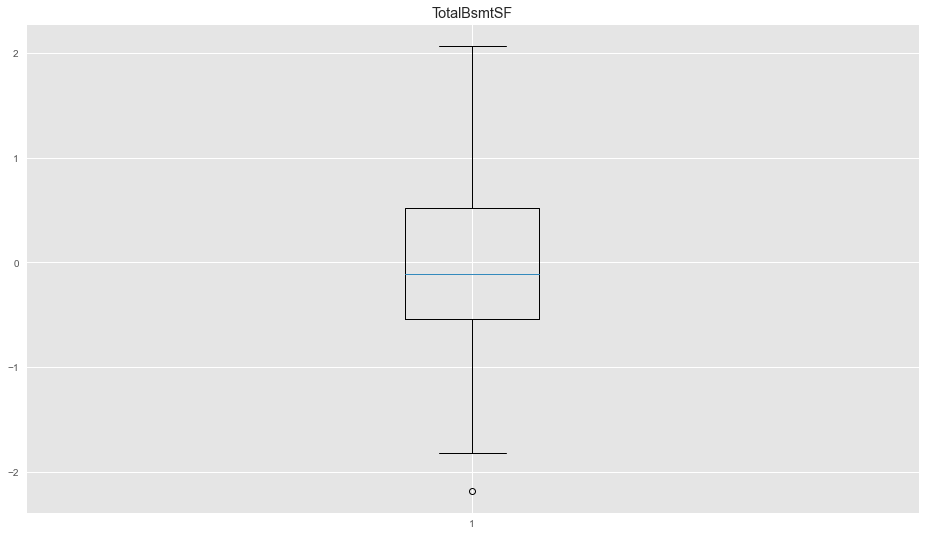

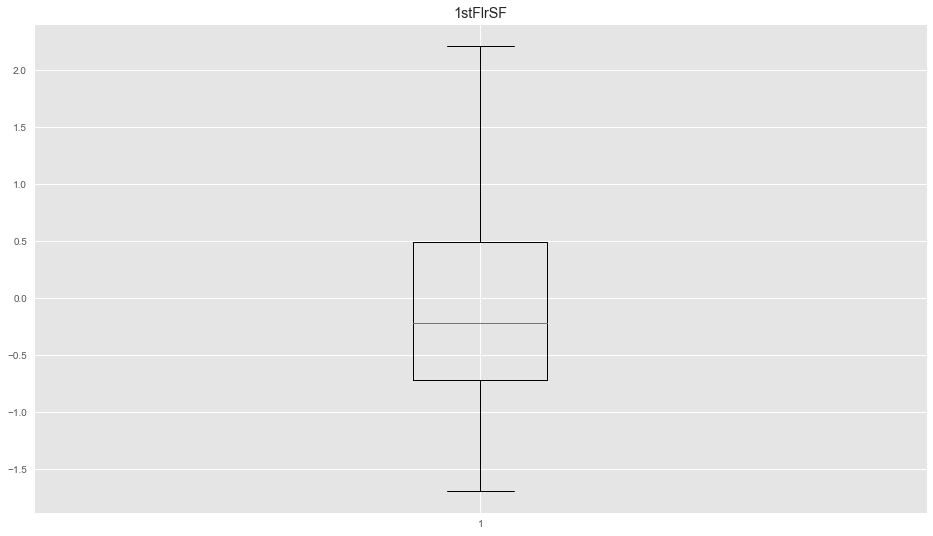

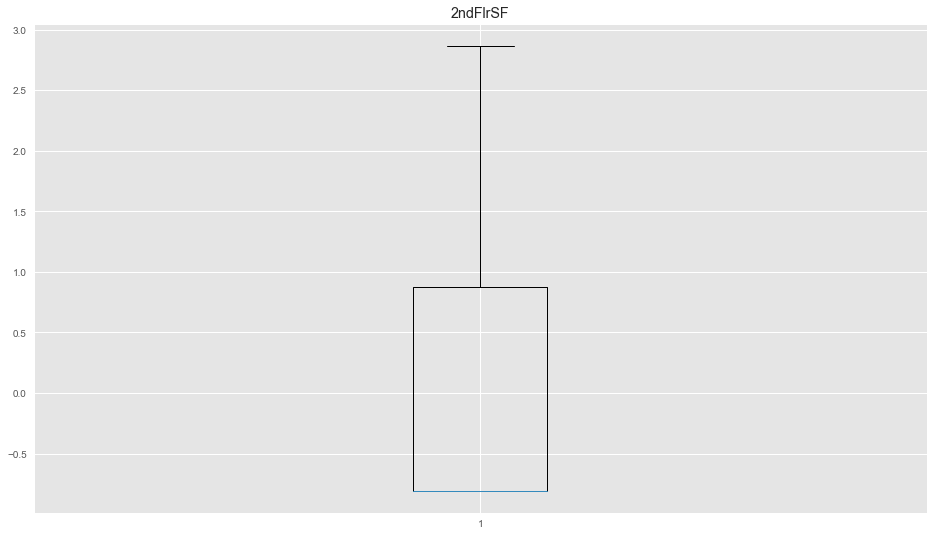

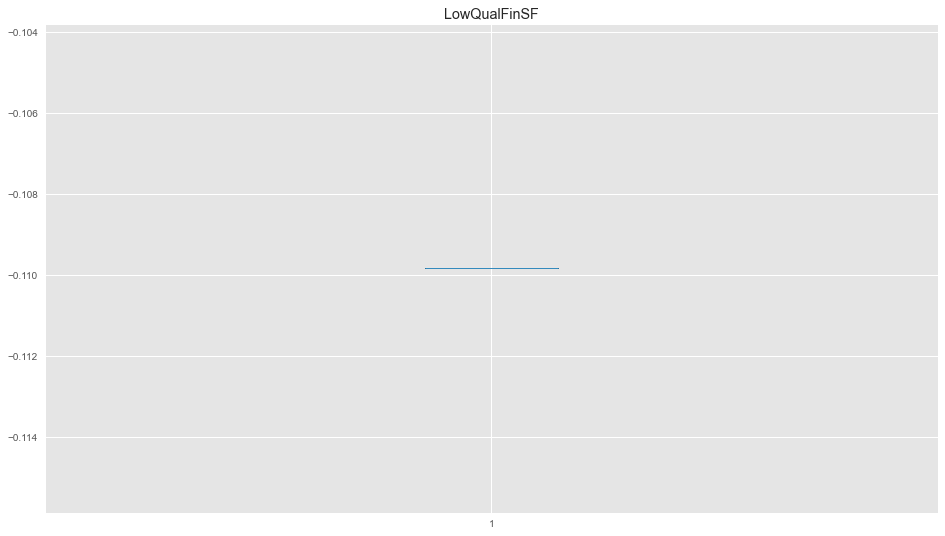

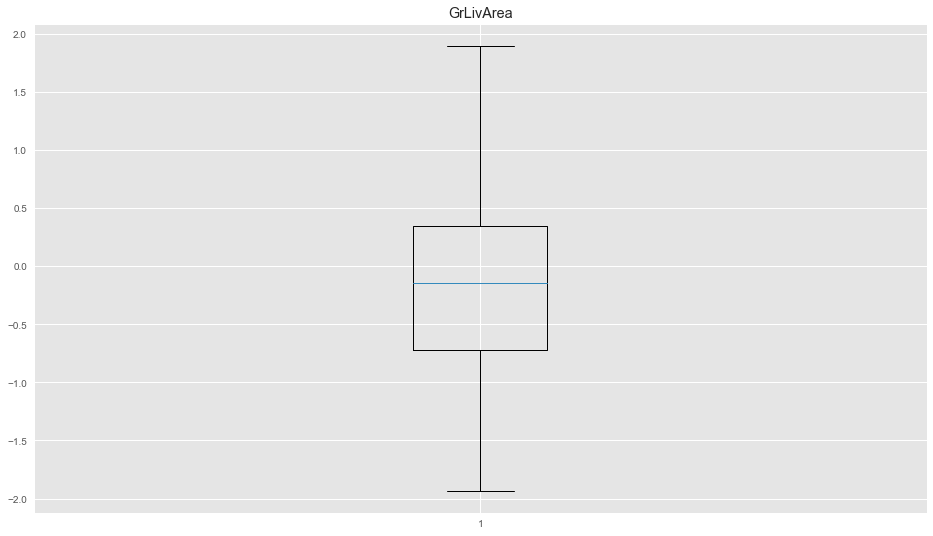

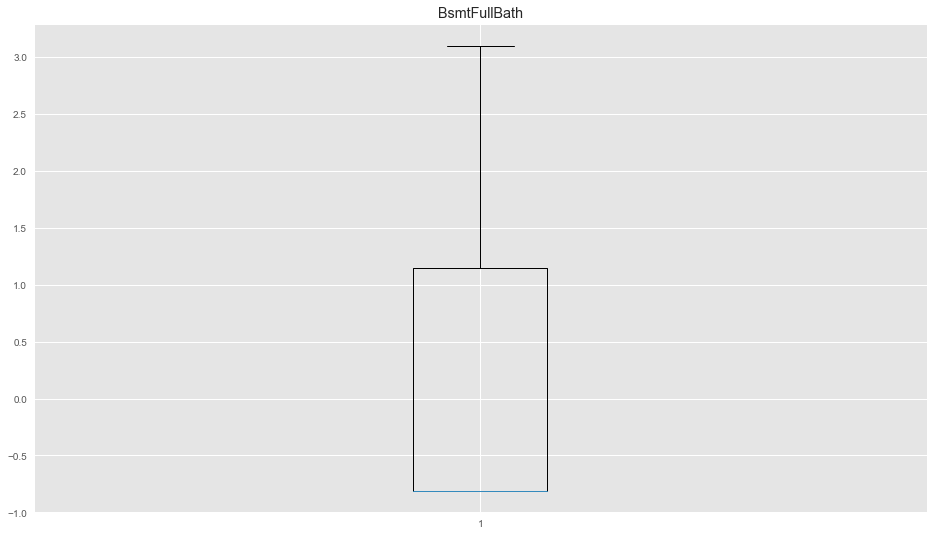

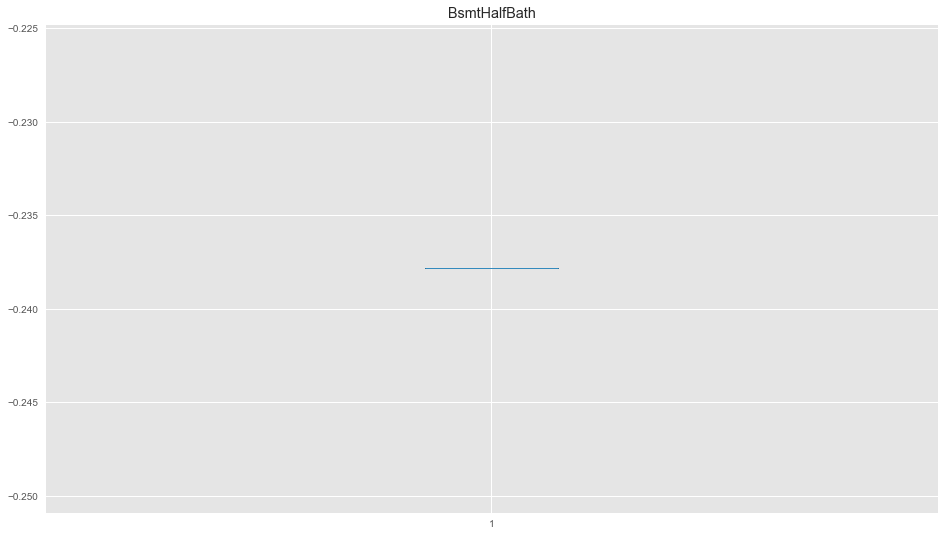

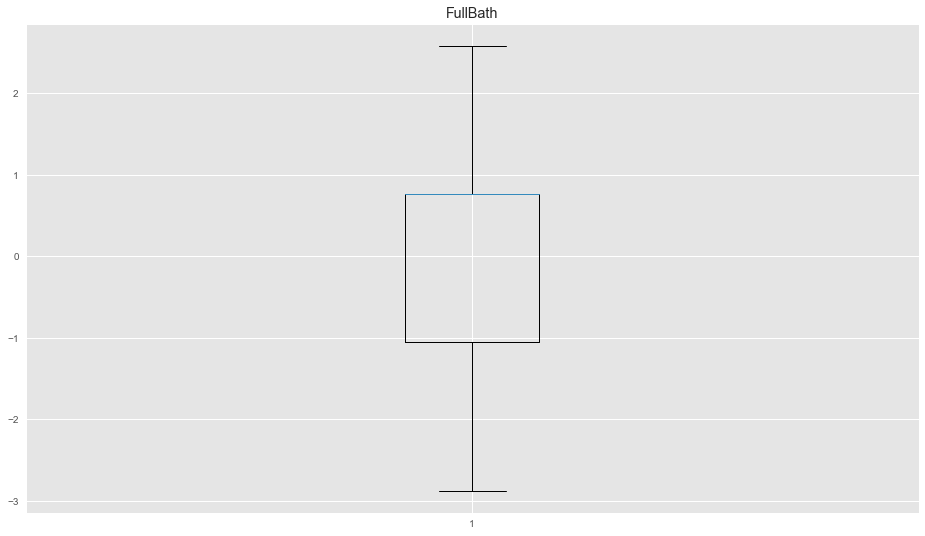

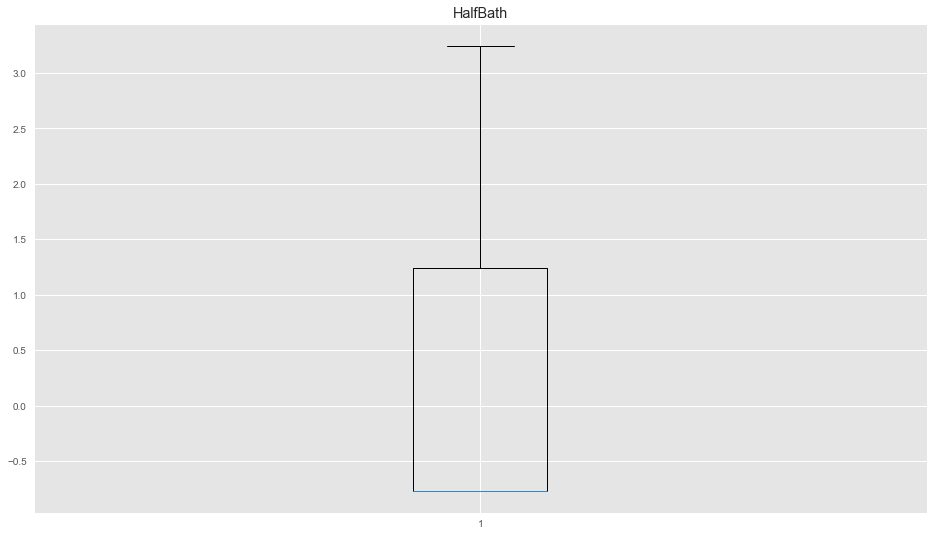

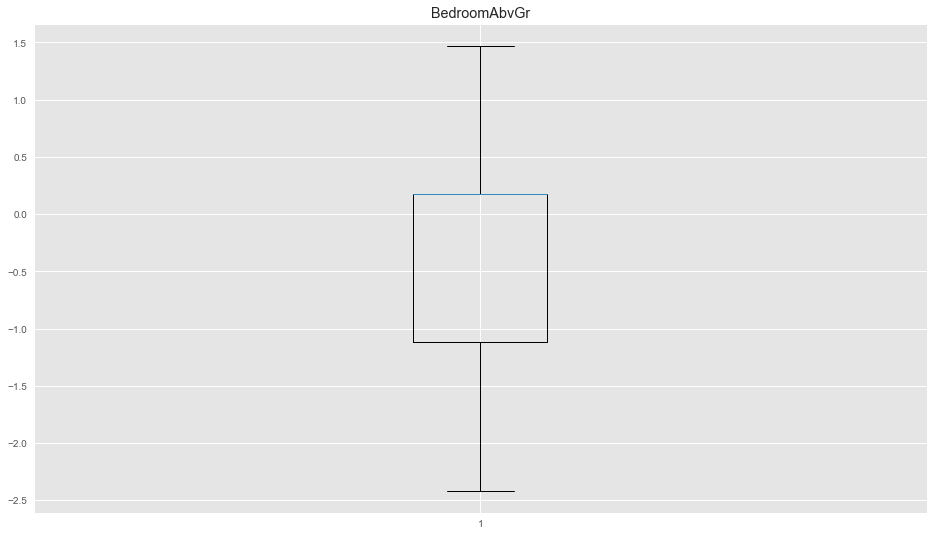

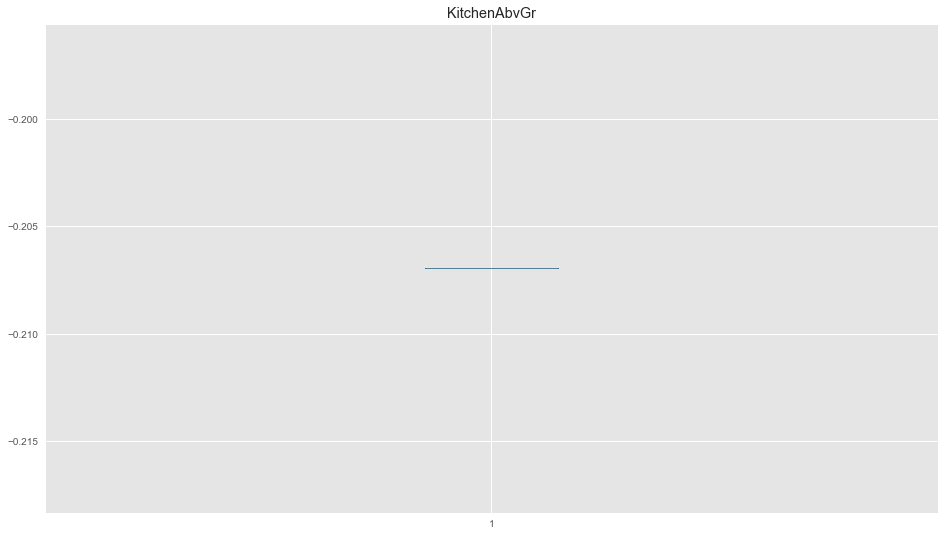

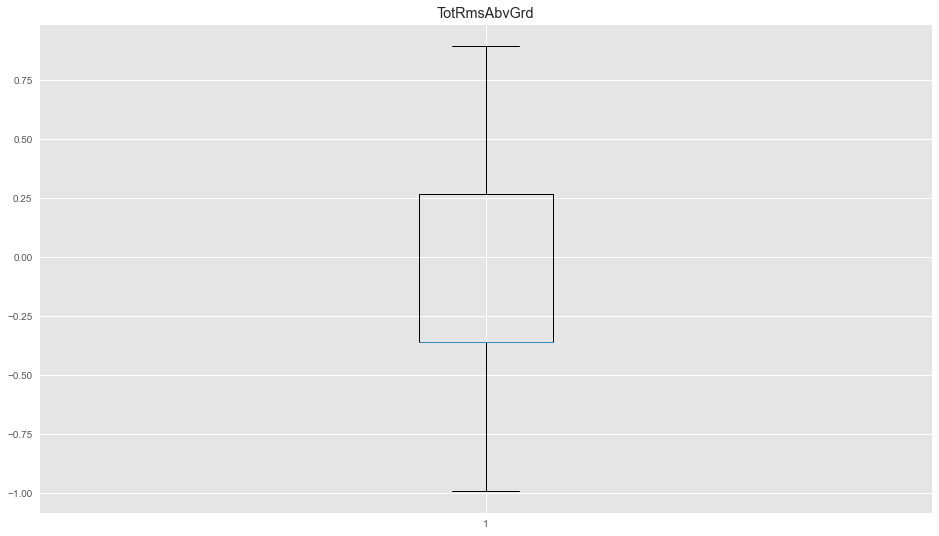

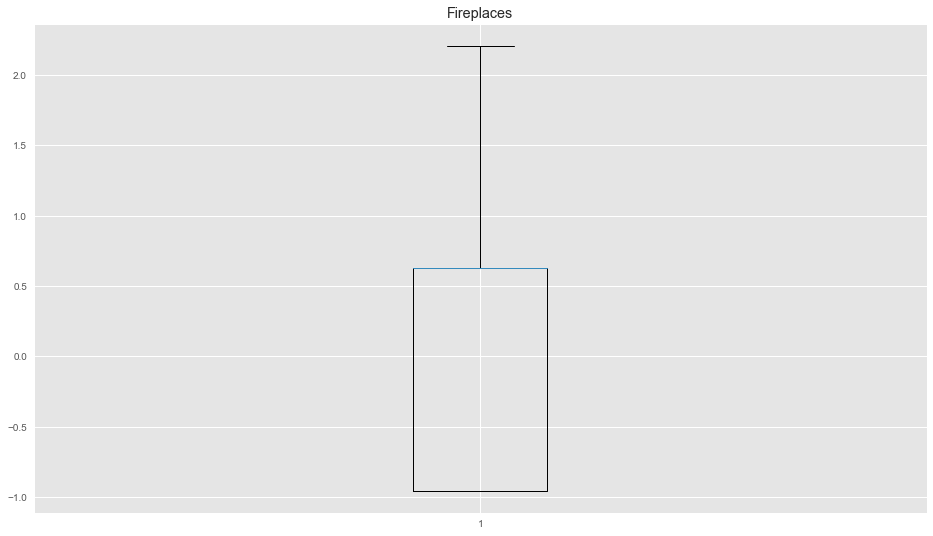

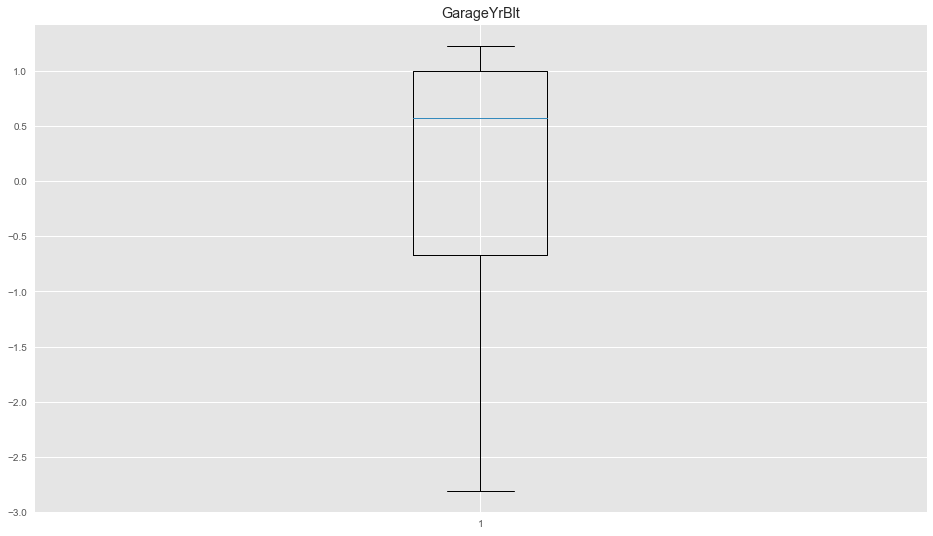

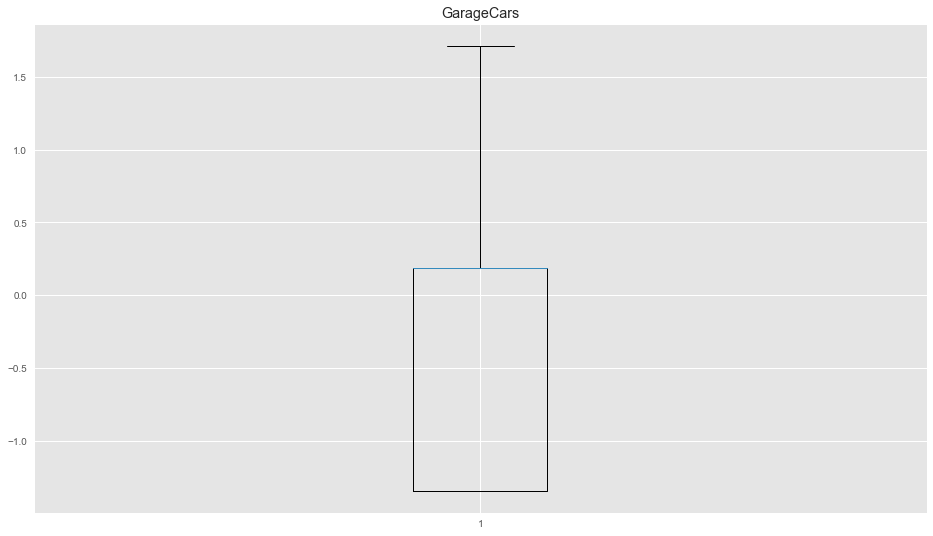

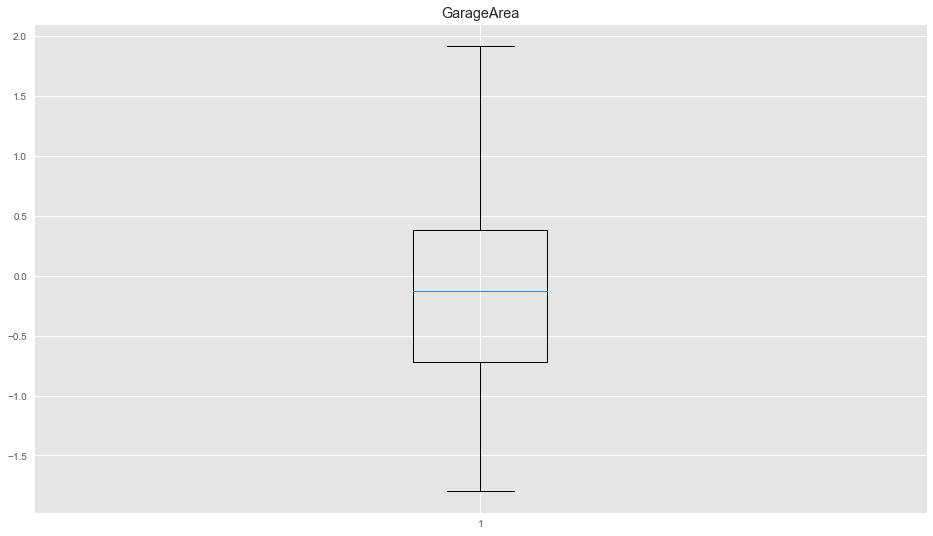

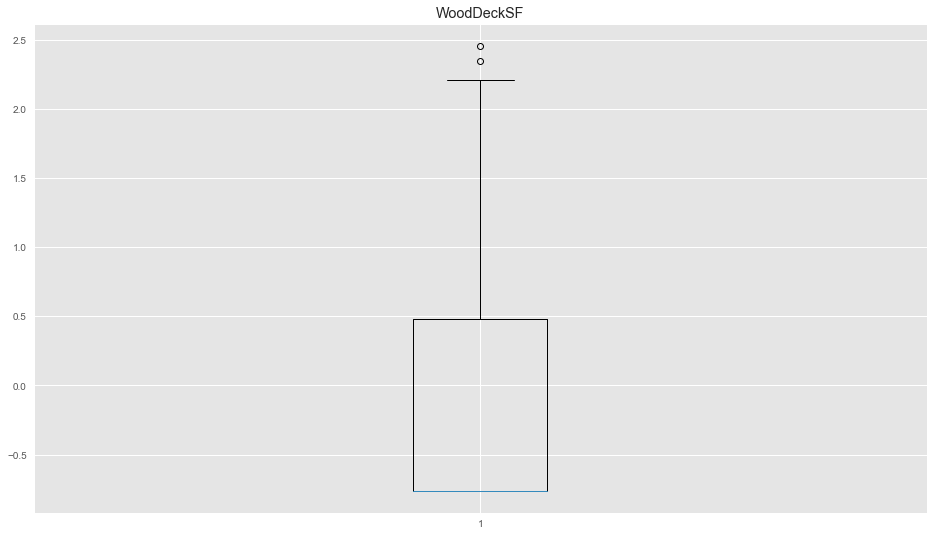

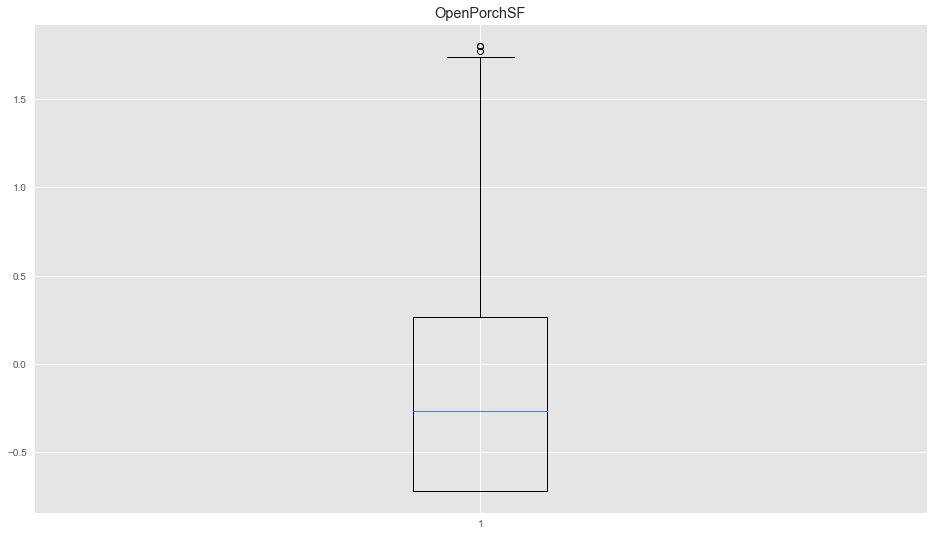

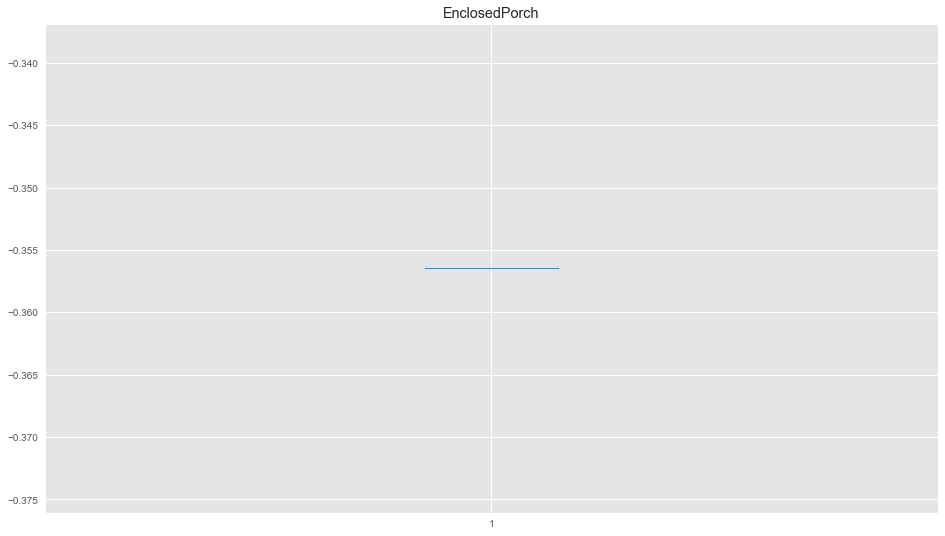

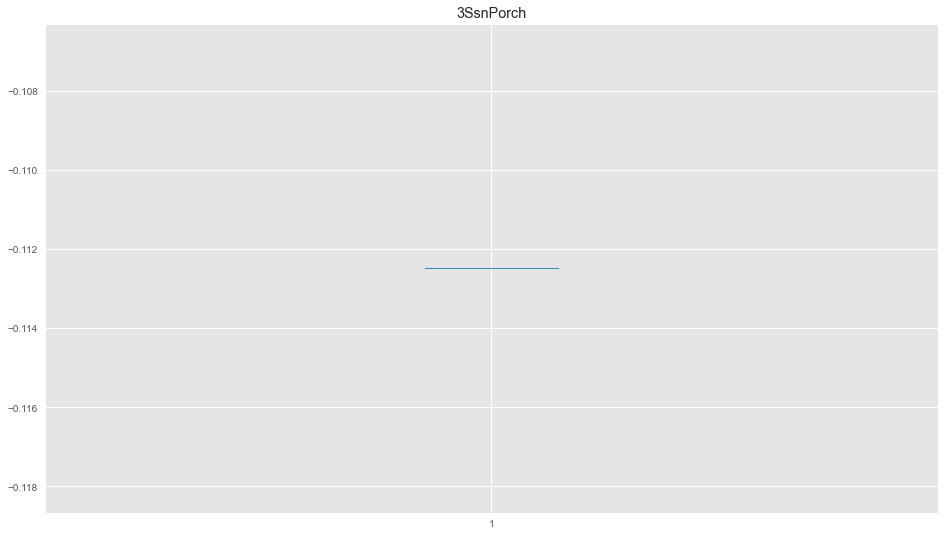

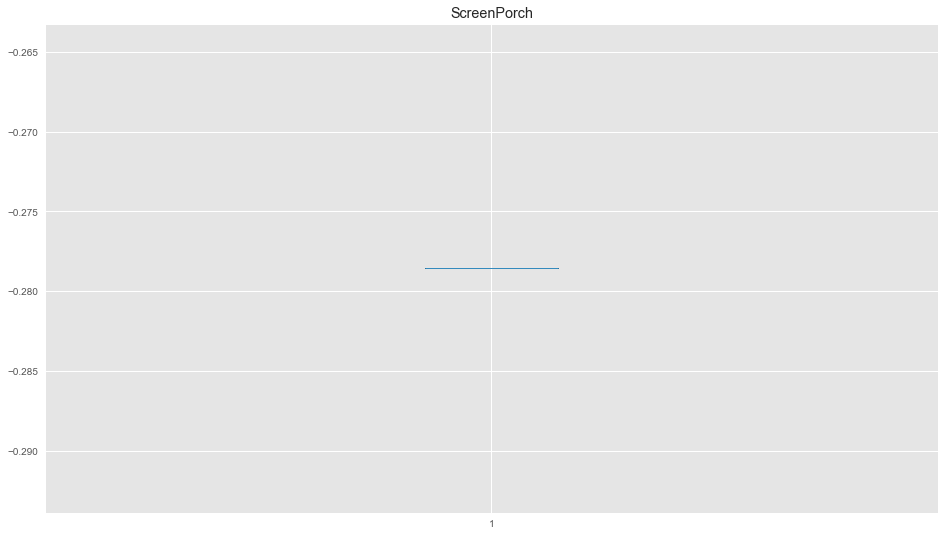

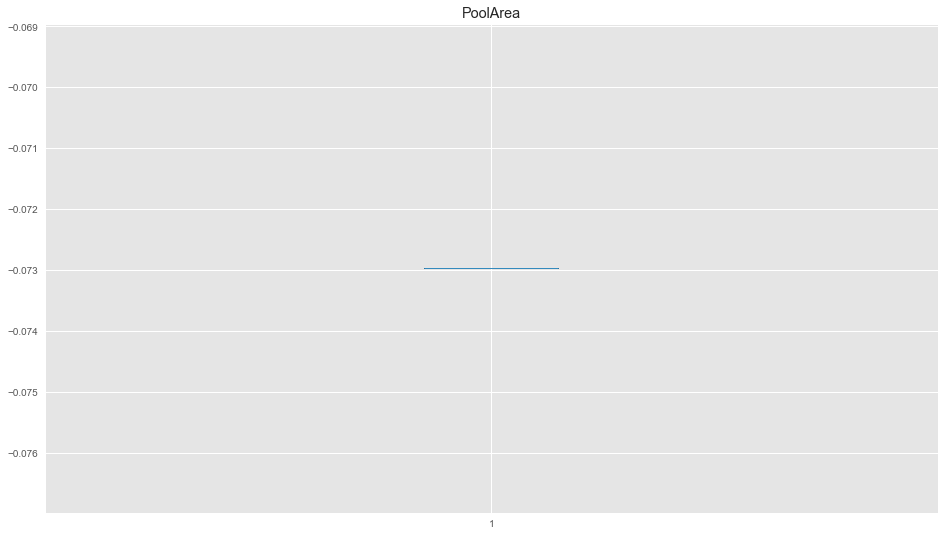

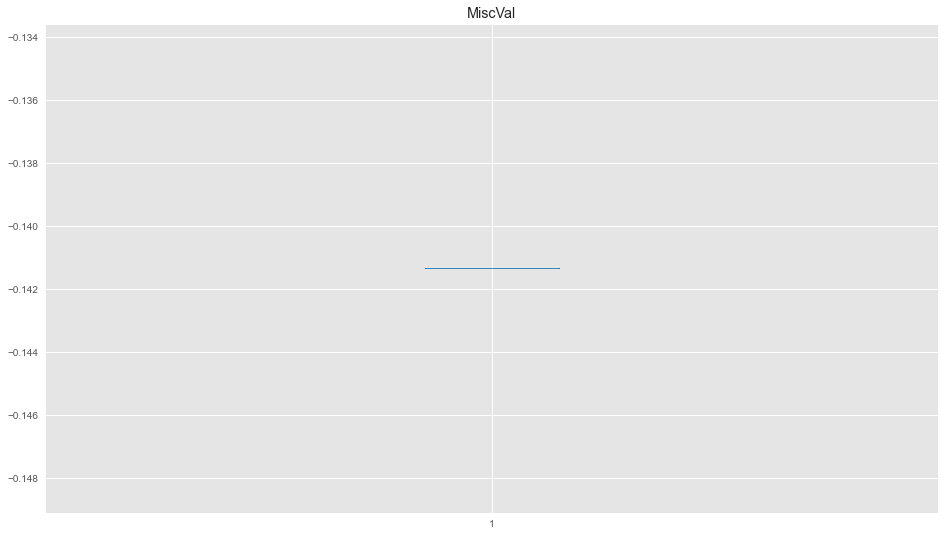

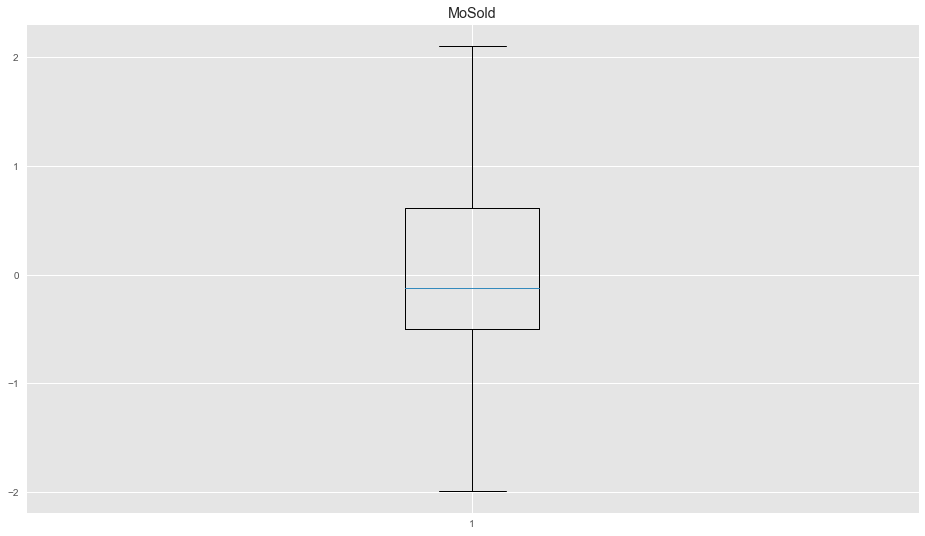

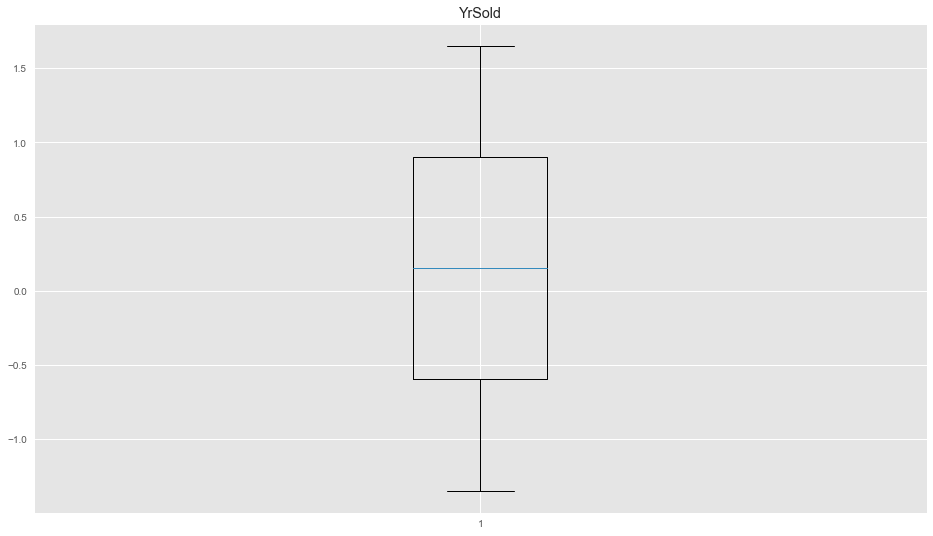

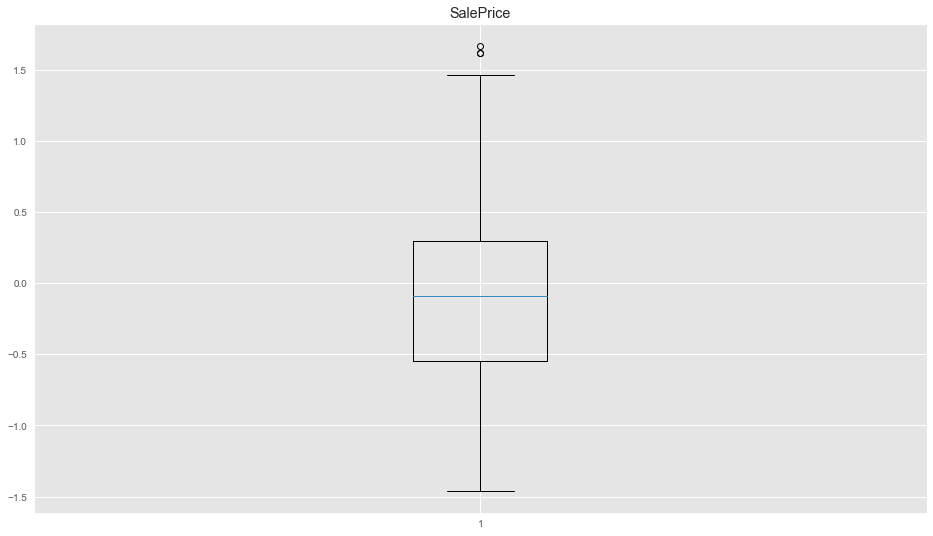

In [7]:
columns = []
for col in entrenamiento.columns:
    columns.append(col)
    
for columna in columns:
    Q1 = entrenamiento[columna].quantile(0.25)
    Q3 = entrenamiento[columna].quantile(0.75)
    IQR = Q3 - Q1

    indexes = entrenamiento[entrenamiento[columna] < (Q1 - 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)

    indexes = entrenamiento[entrenamiento[columna] > (Q3 + 1.5 * IQR)].index
    entrenamiento.drop(indexes, inplace=True)
    
    plt.boxplot(entrenamiento[columna])
    plt.title(columna)
    plt.show()

### 2) Creacion de la variable categórica que especifica si la casa es barata, media o cara

In [8]:
kmeans = cluster.KMeans(n_clusters = 3)
X = np.array(entrenamiento[["SalePrice", "OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "GarageYrBlt", "GarageCars", "GarageArea"]])
X = sklearn.preprocessing.scale(X)
kmeans.fit(X)
entrenamiento['KmeansCluster'] = kmeans.labels_

In [9]:
X = entrenamiento[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", 
                   "GarageYrBlt", "GarageCars", "GarageArea"]]
y = entrenamiento["KmeansCluster"]

### Separando en Train y Test

In [10]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

## Incisos del 3 al 5, Creando módelo, Predicción de cada uno, Matrices de confusión, Comparación

### lbfgs y activación relu

In [28]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), solver = "lbfgs", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
y_pred

array([1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2,
       2, 0, 2])

In [29]:
cm = Confusion_Matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Tiempo de ejecucion: ' + str(round((end - start), 4)))

Matriz de confusión
 [[32  1  0]
 [ 0 48  0]
 [ 0  0 32]]
Accuracy:  0.9911504424778761
Tiempo de ejecucion: 0.0399


### Matriz de Confusión

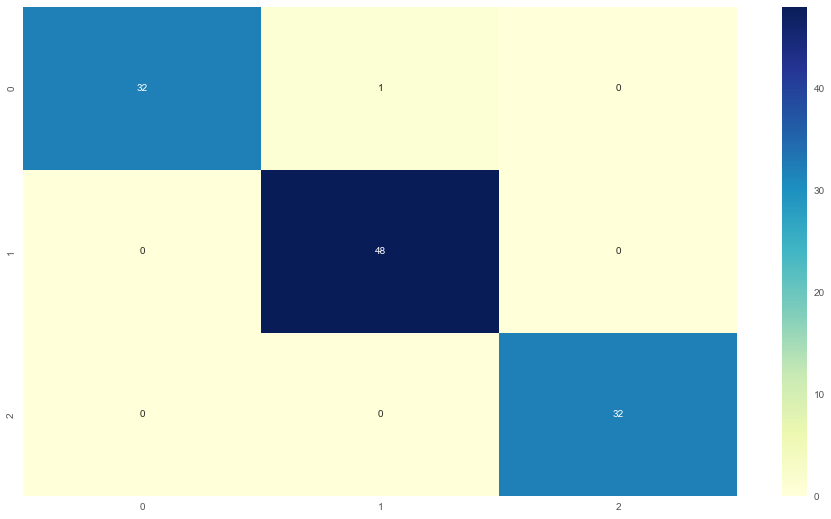

In [30]:
sb.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

### adam y activación tanh

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(10,8), activation="tanh" , solver = "adam", max_iter=1000)
start = time.time()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
end = time.time()
y_pred

array([1, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2,
       2, 2, 0])

In [32]:
cm = Confusion_Matrix(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión\n',cm)
print('Accuracy: ',accuracy)
print('Tiempo de ejecucion: ' + str(round((end - start), 4)))

Matriz de confusión
 [[30  0  3]
 [ 0 48  0]
 [ 2  0 30]]
Accuracy:  0.9557522123893806
Tiempo de ejecucion: 1.1561


### Matriz de Confusión

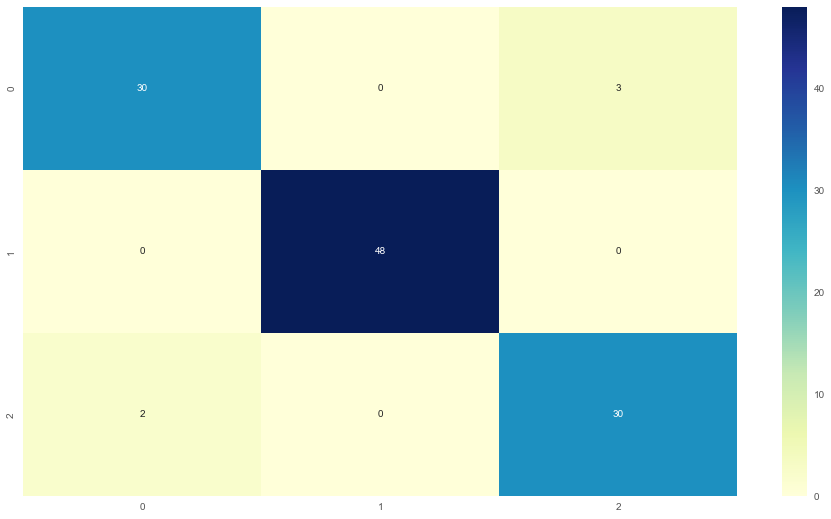

In [33]:
sb.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

## 6) Comparación

In [35]:
topology = ["lbfgs", "adam"]
activations = ["relu", "tanh"]
accuracies = ["0.9911504424778761", "0.9557522123893806"] 
times = ["0.0399", "1.1561"]
errors = ["1", "5"]

d = {'Topología': topology, 'Modo de activación': activations, 'Precision': accuracies, 'Tiempo de ejecucion': times, 'Errores': errors}
df = pd.DataFrame(data=d)
pd.options.display.max_colwidth = 100
df

,Topología,Modo de activación,Precision,Tiempo de ejecucion,Errores
0,lbfgs,relu,0.9911504424778761,0.0399,1
1,adam,tanh,0.9557522123893806,1.1561,5


Podemos ver que utilizar un modelo de RNA basado en la topología lbfgs y modo de activación relu, nos da una efectividad de casi el 100% mientras que utilizano la topología adam y tanh, el resultado es de 0.95 en mucho mayor tiempo, por lo que en efectividad, equivocación gana el primer modelo. La importancia de los errores en este caso, es que predijo casas que pertenecieran a dos grupos al mismo tiempo(economicas, medias, caras) lo cual no es posible porque tienen que pertenecer estrictamente a un grupo para que esta puedan pertener a la variable categorica. 